For any organization, even the slightest chance of financial risk can not be ignored. Organizations conduct regular inspections on their expenditures and revenue to make sure that they do not fall below the critical limit. In this hackathon, you as a data scientist must use the given data to predict whether an organization is under a possible financial risk or not.

Given are 7 distinguishing factors that can provide insight into whether an organization may face a financial risk or not. Your objective as a data scientist is to build a machine learning model that can predict if an organization will fall under the risk using the given features.

score - logloss

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#change the drive to working drive
import os
os.chdir('/content/drive/My Drive/Hackathon/')

In [0]:
#unzip the file
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/Hackathon/Financial_Risk_Participants_Data.zip','r') as z:
  z.extractall()

In [0]:
#change the drive to working drive
os.chdir('/content/drive/My Drive/Hackathon/Financial_Risk_Participants_Data')

In [5]:
#import lib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,StackingClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgbm
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#importing data
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [7]:
train_df.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [9]:
train_df.isnull().any().value_counts

<bound method IndexOpsMixin.value_counts of City                    False
Location_Score          False
Internal_Audit_Score    False
External_Audit_Score    False
Fin_Score               False
Loss_score              False
Past_Results            False
IsUnderRisk             False
dtype: bool>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c989a89e8>,
      dtype=object)

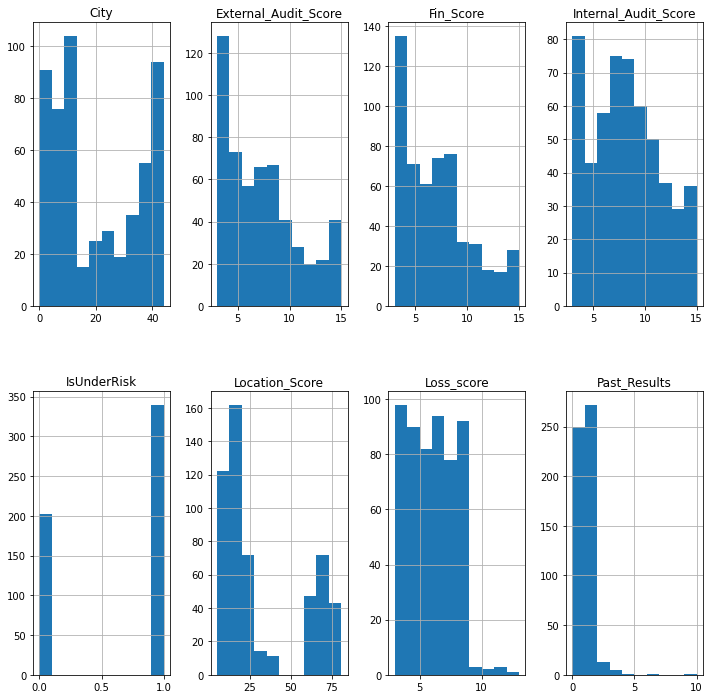

In [10]:
train_df.hist(layout = (2,4),figsize = (12,12))

Past Result and city are categorical data 


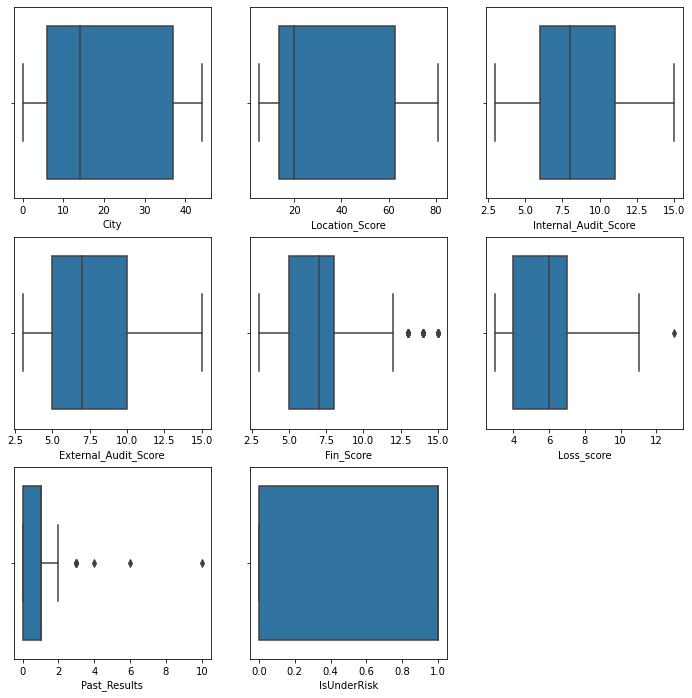

In [11]:
plt.figure(figsize=(12,12))
c = 0
for i in train_df.columns:
  c += 1
  plt.subplot(3,3,c)
  sb.boxplot(train_df[i])

Fin_score is having outlier 
Loss_score may have outlier
past result showing that they are having outlier but they are categorical data 
But If you look at the histrogram we can see that most independet features are categorical but we dont have any info about the columns but by analysing the data we can consider that most of them are categorical so tree based model work well, let see by using different models

In [0]:
#defining folds for training dataset
stf = StratifiedKFold(shuffle = True)

In [0]:
#separating dependent and independt variable
x_train , y_train = train_df.iloc[:,0:-1] , train_df.IsUnderRisk

In [14]:
#Upsacling the dataset
sm = SMOTE()
x_train1 , y_train1  = sm.fit_resample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#submission file generation
def file(y_pred):
  final = pd.DataFrame(data = y_pred , columns = ['0','1'])
  final.to_excel('final.xlsx',index = False)

In [0]:
#xgboost
#defining tunning parameter
params = {
    'learning_rate' : [0.1,0.001,0.01],
    'max_depth': range(7,51,3),
    'min_child_weight' : [1,2,3,5],
    'lamdba':[0.5,1,2,0.2,0.3],
    'gamma':[0.1,0.2,0.3],
    'scale_pos_weight' : [1,3,2,0.5],
    'subsample':[0.5,1],
    'n_estimators':[5000],
    'early_stopping_rounds':[5],
    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9 ],
    'num_boost_round' :[999]
}


#defining model
classifier = xgb.XGBClassifier()

#parameter tunning algo
xgbc = RandomizedSearchCV(estimator=classifier,param_distributions=params,n_iter=10,scoring='neg_log_loss',cv=stf,verbose=1,n_jobs=-1)

In [17]:
#training model
xgbc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='bi...
                                        'early_stopping_rounds': [5],
                                        'gamma': [0.1, 0.2, 0.3],
                                        'lamdba': [0.5, 1, 2, 0.2, 0.3],
                                     

In [18]:
#best score
xgbc.best_score_

-0.31305694876447876

In [0]:
#xgbc prediction
file(xgbc.predict_proba(test_df))

In [0]:
#ligtgmb  modeling
from lightgbm import LGBMClassifier

params_lgbm = {
 'learning_rate': [0.1,0.01,0.001,0.05],
 'max_depth':[3,5,7,11,13,17,19,21],
 'num_leaves': [15,30,50],
 'feature_fraction': [0.5,0.9,0.7],
 'bagging_fraction': [0.5,0.3,0.7],
 'bagging_freq': [20,40,50],
 'num_iterations':[50],
 'verbose': [-1],
 'min_child_weight' : [1,2,3,5],
 'colsample_bytree':[0.5,0.6,0.7,0.8,0.9 ],
 'num_boost_round' :[999],
 'reg_alpha': [0, 1e-1, 1, 2, 5],
 'reg_lambda': [0, 1e-1, 1, 5],
 'scale_pos_weight' : [1,3,2,0.5],
 'subsample':[0.5,1],
 'n_estimators':[1000]

}


lgbm1 = LGBMClassifier()

#parameter tunning algo
lgbm_random = RandomizedSearchCV(estimator=lgbm1,param_distributions=params_lgbm,n_iter=5000,scoring='neg_log_loss',cv=stf,verbose=1,n_jobs=-1)

In [21]:
lgbm_random.fit(x_train1,y_train1)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 14300 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 19500 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 25000 out of 25000 | elapsed:  5.1min finished
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective...
                                        'min_child_weight': [1, 2, 3, 5],
                                        'n_estimators': [1000],
                                        'num_boost_round':

In [22]:
lgbm_random.best_score_

-0.26350966259784986

In [0]:
file(lgbm_random.predict_proba(test_df))

In [0]:
xtc = ExtraTreesClassifier()
xtc_param = {
    'n_estimators' : [1000],
    'criterion':['gini','entropy'],
    'max_depth': [3,5,7,11,15,17,19]
}

In [25]:
xtcc = RandomizedSearchCV(estimator=xtc,param_distributions=xtc_param,n_iter=10,scoring='neg_log_loss',cv=stf,verbose=1,n_jobs=-1)
xtcc.fit(x_train1,y_train1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_spli...
                                           

In [26]:
xtcc.best_score_

-0.27550444704506305

In [0]:
file(xtcc.predict_proba(test_df))

In [0]:
st = StackingClassifier(estimators = [('lgbm',lgbm_random.best_estimator_),('xgb',xgbc.best_estimator_)],final_estimator= xtcc, cv = stf , passthrough = True,stack_method='predict_proba')

In [29]:
st.fit(x_train1,y_train1)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x7F5C9402B468, shuffle=True),
                   estimators=[('lgbm',
                                LGBMClassifier(bagging_fraction=0.7,
                                               bagging_freq=40,
                                               boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=0.8,
                                               feature_fraction=0.9,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=5,
                                               min_child_samples=20,
                                               min_child...
                                                                                     verbose=0,
                                                    

In [0]:
file(st.predict_proba(test_df.values))